In [10]:
%matplotlib inline
from bigbang.archive import Archive
from bigbang import repo_loader;
from bigbang.git_repo import GitRepo;
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx

In [11]:
repo = repo_loader.get_org_multirepo("glass-bead-labs")


In [12]:
full_info = repo.commit_data

In [13]:
G = nx.Graph()
full_info = repo.commit_data
handled = pd.DataFrame(full_info.groupby(["Repo Name", "Committer Name"]).size())

# Author -> Repo
def make_graph(row):
    repo_name = row.name[0]
    committer_name = row.name[1]
    count = row[0]
    
    if committer_name not in G:
        G.add_node(committer_name, type="committer")
        
    if repo_name not in G:
        G.add_node(repo_name, color="blue", type="repo")
    
    if repo_name not in G[committer_name]:
        G.add_edge(committer_name, repo_name, weight=0)
        
    G[committer_name][repo_name]["weight"] += 1;
        
    return row
    
handled = handled.apply(make_graph, axis=1)


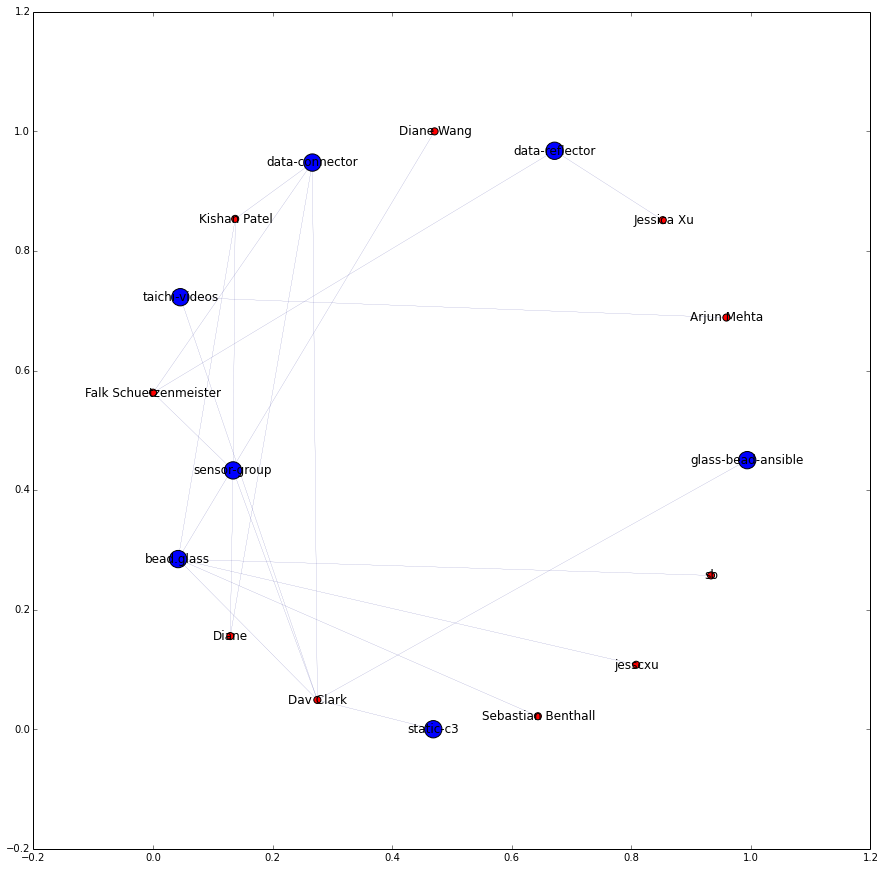

In [14]:
widths = [G[u][v]['weight']/10.0 for u, v in G.edges()]
#nx.draw(G)
plt.figure(1,figsize=(15, 15))
pos = nx.spring_layout(G, k = 0.6, iterations = 50)
nx.draw_networkx_nodes(G, pos, nodelist = [node[0] for node in G.nodes(data=True) if node[1]["type"] == 'committer'], node_size=50, node_color = 'r')
nx.draw_networkx_nodes(G, pos, nodelist = [node[0] for node in G.nodes(data=True) if node[1]["type"] == 'repo'], node_color = 'b')
#nx.draw_networkx_edges(G, pos, edge_color = 'g', alpha = 0.8)
nx.draw_networkx_edges(G, pos, width=widths, edge_color = widths)
nx.draw_networkx_labels(G, pos);

In [15]:
repos = [node[0] for node in G.nodes(data=True) if node[1]["type"] == 'repo']
committers = [node[0] for node in G.nodes(data=True) if node[1]["type"] == 'committer']
# Repo -> Repo
NG = nx.Graph()
for u,v in G.edges():
    committer = v
    repo = u
    if u in committers:
        committer = u
        repo = v
    if repo not in NG:
        NG.add_node(repo);
    
    for other_repo in repos:
        if other_repo != repo:
            if committer in G[other_repo]:
                to_add = min(G[repo][committer]["weight"], G[other_repo][committer]["weight"])
                
                if other_repo not in NG[repo]:
                    NG.add_edge(repo, other_repo, weight=0);
                
                NG[repo][other_repo]["weight"] += to_add;


    
    

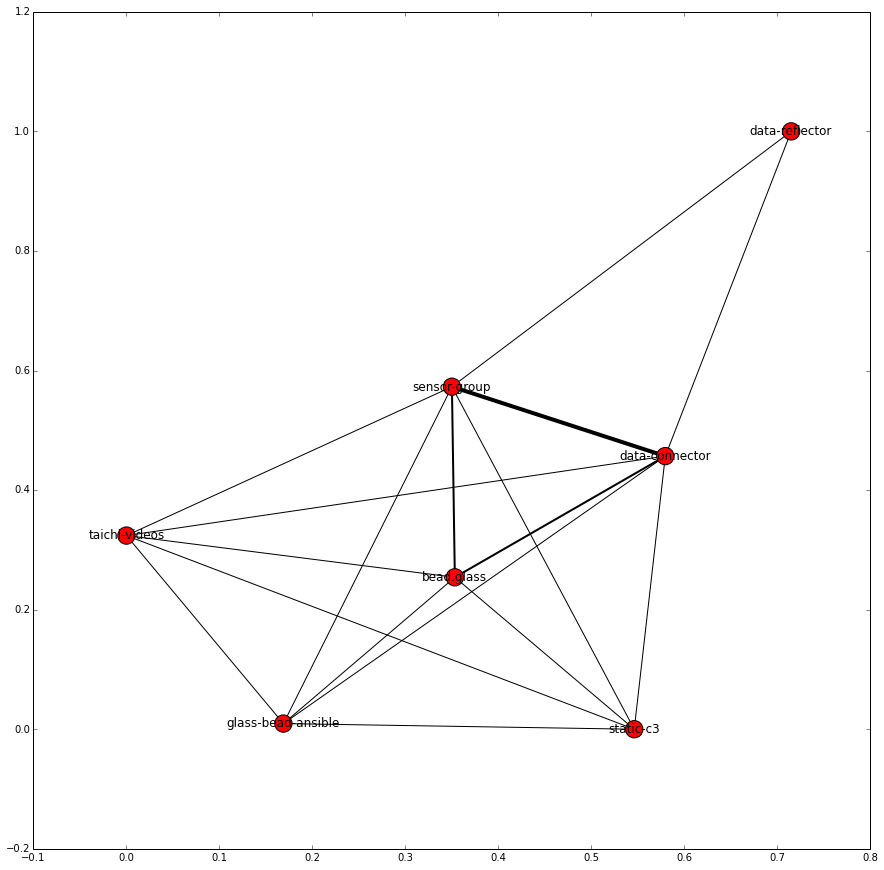

In [18]:
widths = [NG[u][v]['weight']/2.0 for u, v in NG.edges()]
plt.figure(1,figsize=(15, 15))
pos = nx.spring_layout(NG, k = 0.6, iterations = 100)
nx.draw_networkx_nodes(NG, pos, nodelist = [node[0] for node in NG.nodes(data=True)], node_color = 'r')
nx.draw_networkx_edges(NG, pos, width=widths)
nx.draw_networkx_labels(NG, pos);